# 6. Decision Trees and Ensemble Learning

## 6.2 Data cleaning and preparation

Dataset: https://github.com/gastonstat/CreditScoring

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'


In [ ]:
!wget $data

--2024-10-24 03:22:49--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.04s   

2024-10-24 03:22:50 (4.66 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [ ]:
data_path = '/content/CreditScoring.csv'
df = pd.read_csv(data_path)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [ ]:
df.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [ ]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [ ]:
for c in ['income', 'assets', 'debt']:
  df[c] = df[c].replace(to_replace=99999999, value=np.nan).max()


In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,959.0,300000.0,30000.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,0.0,0.0,0.0,475.0,628.0
min,0.0,6.0,18.0,35.0,959.0,300000.0,30000.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,959.0,300000.0,30000.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,959.0,300000.0,30000.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,959.0,300000.0,30000.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [ ]:
df.status.value_counts()

,count
status,
ok,3200
default,1254
unk,1


In [ ]:
df[df.status != 'unk'].reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,959.0,300000.0,30000.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,959.0,300000.0,30000.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,959.0,300000.0,30000.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,959.0,300000.0,30000.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,959.0,300000.0,30000.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,959.0,300000.0,30000.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,959.0,300000.0,30000.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,959.0,300000.0,30000.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,959.0,300000.0,30000.0,550,550


In [ ]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# trasformazione in binario della colonna status
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [ ]:
del df_train['status']
del df_val['status']
del df_test['status']

In [ ]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,959.0,300000.0,30000.0,2500,3559
1,5,rent,48,30,separated,yes,partime,39,959.0,300000.0,30000.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,959.0,300000.0,30000.0,1550,1612
3,2,rent,12,47,married,yes,fixed,103,959.0,300000.0,30000.0,350,450
4,6,parents,48,32,single,yes,fixed,35,959.0,300000.0,30000.0,1100,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,1,parents,60,21,single,no,partime,35,959.0,300000.0,30000.0,400,904
2669,5,rent,60,47,single,yes,fixed,46,959.0,300000.0,30000.0,2500,2664
2670,23,rent,24,47,single,no,fixed,44,959.0,300000.0,30000.0,350,975
2671,5,owner,60,58,married,no,freelance,45,959.0,300000.0,30000.0,1500,2090


## 6.3 Decision trees


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score


In [ ]:
def assess_risk(client):
  if client['records'] == 'yes':
    if client['jon'] == 'parttime':
      return 'default'
    else:
      return 'ok'
  else:
    if client['assets'] > 6000:
      return 'ok'
    else:
      return 'defalt'


In [ ]:
xi = df_train.iloc[0].to_dict()

In [ ]:
assess_risk(xi)

'ok'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [ ]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [ ]:
train_dicts[:2]

[{'seniority': 3,
  'home': 'rent',
  'time': 36,
  'age': 61,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 41,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 2500,
  'price': 3559},
 {'seniority': 5,
  'home': 'rent',
  'time': 48,
  'age': 30,
  'marital': 'separated',
  'records': 'yes',
  'job': 'partime',
  'expenses': 39,
  'income': 959.0,
  'assets': 300000.0,
  'debt': 30000.0,
  'amount': 1300,
  'price': 1600}]

In [ ]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[6.10e+01, 2.50e+03, 3.00e+05, ..., 0.00e+00, 3.00e+00, 3.60e+01],
       [3.00e+01, 1.30e+03, 3.00e+05, ..., 1.00e+00, 5.00e+00, 4.80e+01],
       [3.20e+01, 1.55e+03, 3.00e+05, ..., 0.00e+00, 1.50e+01, 6.00e+01],
       ...,
       [4.70e+01, 3.50e+02, 3.00e+05, ..., 0.00e+00, 2.30e+01, 2.40e+01],
       [5.80e+01, 1.50e+03, 3.00e+05, ..., 0.00e+00, 5.00e+00, 6.00e+01],
       [2.20e+01, 1.25e+03, 3.00e+05, ..., 0.00e+00, 4.00e+00, 4.80e+01]])

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6546619859330769

In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [ ]:
xi

{'seniority': 3,
 'home': 'rent',
 'time': 36,
 'age': 61,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 41,
 'income': 959.0,
 'assets': 300000.0,
 'debt': 30000.0,
 'amount': 2500,
 'price': 3559}

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('val:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('train:', auc)




val: 0.7596579886475223
train: 0.7371228321734508


In [ ]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out() ))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- seniority <= 5.50
|   |   |   |--- class: 0
|   |   |--- seniority >  5.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- seniority <= 1.50
|   |   |   |--- class: 1
|   |   |--- seniority >  1.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- job=fixed <= 0.50
|   |   |   |--- class: 1
|   |   |--- job=fixed >  0.50
|   |   |   |--- class: 0



## 6.4 Decision tree learning algorithm

In [ ]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [ ]:
df_example.sort_values('assets')


,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [ ]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [ ]:
from IPython.display import display

In [ ]:

T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [ ]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [ ]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [ ]:
df_example.sort_values('debt')


,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [ ]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [ ]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


## 6.5 Decision trees parameter tuning

In [ ]:
for d in [1,2,3,4,5,6,10,15,20,None]:
  dt = DecisionTreeClassifier(max_depth=d)
  dt.fit(X_train, y_train)

  y_pred = dt.predict_proba(X_val)[:, 1]
  auc = roc_auc_score(y_val, y_pred)

  print('%4s -> %.3f' % (d, auc))

   1 -> 0.613
   2 -> 0.688
   3 -> 0.737
   4 -> 0.758
   5 -> 0.763
   6 -> 0.746
  10 -> 0.687
  15 -> 0.648
  20 -> 0.663
None -> 0.635


In [ ]:
scores = []

for depth in [4, 5, 6, 7, 8, 9, 10]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

In [ ]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
27,7,15,0.777000
28,7,20,0.775798
26,7,10,0.772744
35,8,15,0.772383
36,8,20,0.772179
51,10,15,0.770587
52,10,20,0.770368
43,9,15,0.770158
38,8,100,0.768387
54,10,100,0.767930


In [ ]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                          
max_depth            4      5      6      7      8      9      10
min_samples_leaf                                                 
1                 0.758  0.763  0.750  0.736  0.722  0.709  0.687
5                 0.758  0.766  0.759  0.763  0.744  0.738  0.745
10                0.757  0.765  0.767  0.773  0.767  0.753  0.768
15                0.756  0.762  0.766  0.777  0.772  0.770  0.771
20                0.757  0.762  0.764  0.776  0.772  0.767  0.770
100               0.751  0.761  0.763  0.766  0.768  0.768  0.768
200               0.750  0.756  0.757  0.757  0.757  0.757  0.757
500               0.649  0.649  0.649  0.649  0.649  0.649  0.649

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

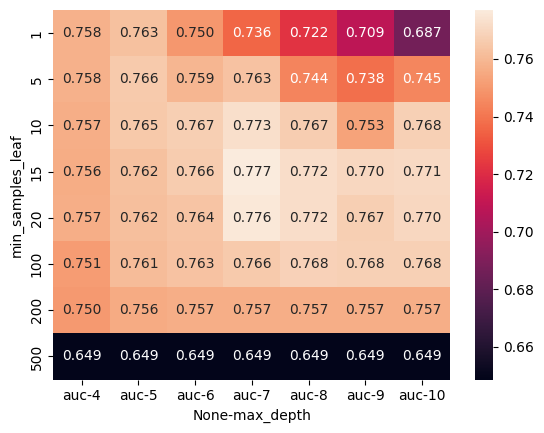

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6.6 Ensembles of random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]


In [ ]:
roc_auc_score(y_val, y_pred)

0.7576762382724136

In [ ]:
scores = []
for d in [5,10,15]:
  for n in range(10, 200, 10):
    rf = RandomForestClassifier(n_estimators=n,
                                max_depth=d,
                                random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((d, n, auc))



In [ ]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.784287
1,5,20,0.781122
2,5,30,0.782278
3,5,40,0.786750
4,5,50,0.791573


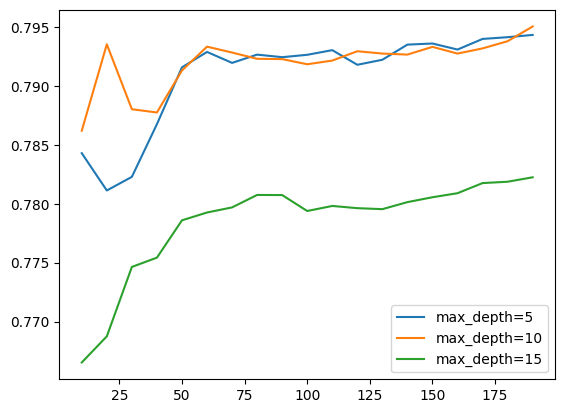

In [ ]:
for d in [5, 10, 15]:
  df_subset = df_scores[df_scores.max_depth == d]
  plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)

plt.legend()

In [ ]:
max_depth = 10


In [ ]:

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [ ]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

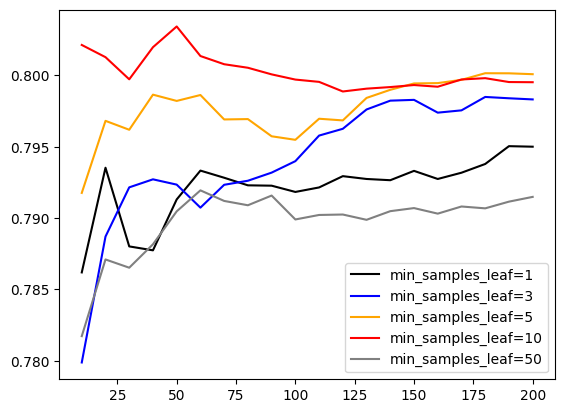

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [ ]:
min_samples_leaf=5

In [ ]:
rf = RandomForestClassifier(n_estimators=n,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

## 6.7 Gradient boosting and XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
features = dv.get_feature_names_out()
features = features.tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names = features)

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nhtread': 8,

    'seed': 1,
    'verbosity': 1,

}


model = xgb.train(xgb_params, dtrain,
                  evals = watchlist,
                  verbose_eval=5,
                  num_boost_round = 200)

In [ ]:
s = output.stdout

In [ ]:
line = s.split('\n')[0]

In [ ]:
line.split('\t')

['[0]', 'train-auc:0.83830', 'val-auc:0.76483']

In [ ]:
num_iter, train_auc, val_auc = line.split('\t')

In [ ]:
int(num_iter.strip('[]'))

0

In [ ]:
float(train_auc.split(':')[1])

0.8383

In [ ]:
y_pred = model.predict(dval)

In [ ]:
roc_auc_score(y_val, y_pred)

0.7767154105736783

In [ ]:
def parse_xgb_output(output):
  results = []
  for line in output.stdout.strip().split('\n'):
    it_line, train_line, val_line = line.split('\t')

    it = int(it_line.strip('[]'))
    train = float(train_line.split(':')[1])
    val = float(val_line.split(':')[1])

    results.append((it, train, val))

  columns = ['num_iter', 'train_auc', 'val_auc']
  df_results = pd.DataFrame(results, columns=columns)
  return df_results



In [ ]:
df_score = parse_xgb_output(output)

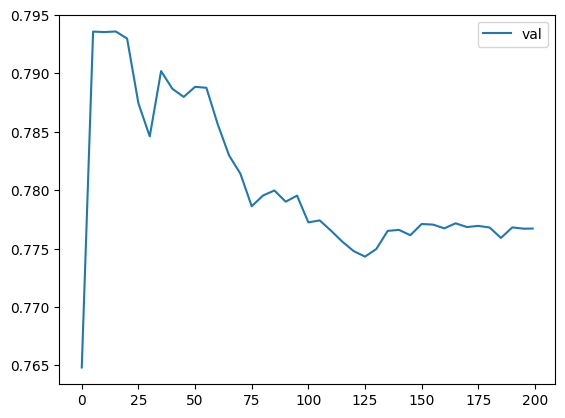

In [ ]:
# plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## 6.8 XGBoost parameter tuning

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nhtread': 8,

    'seed': 1,
    'verbosity': 1,

}


model = xgb.train(xgb_params, dtrain,
                  evals = watchlist,
                  verbose_eval=5,
                  num_boost_round = 200)

In [ ]:
scores = {}

In [ ]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [ ]:
scores

{'eta=1.0':     num_iter  train_auc  val_auc
 0          0    0.83830  0.76483
 1          5    0.92566  0.76420
 2         10    0.96343  0.76854
 3         15    0.98635  0.76383
 4         20    0.99449  0.76803
 5         25    0.99708  0.76699
 6         30    0.99895  0.77222
 7         35    0.99939  0.77037
 8         40    0.99958  0.76989
 9         45    0.99995  0.77483
 10        50    1.00000  0.77526
 11        55    1.00000  0.77556
 12        60    1.00000  0.77638
 13        65    1.00000  0.77497
 14        70    1.00000  0.77560
 15        75    1.00000  0.77583
 16        80    1.00000  0.77434
 17        85    1.00000  0.77644
 18        90    1.00000  0.77778
 19        95    1.00000  0.77879
 20       100    1.00000  0.77748
 21       105    1.00000  0.77599
 22       110    1.00000  0.77406
 23       115    1.00000  0.77348
 24       120    1.00000  0.77381
 25       125    1.00000  0.77442
 26       130    1.00000  0.77322
 27       135    1.00000  0.77293
 28

In [ ]:
# etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

# for eta in etas:
#   df_score = scores[eta]
#   plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
# plt.legend()

## 6.9 Final model

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7660385171633765

In [ ]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8000840554271377

In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8062831431785313

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)


In [ ]:
y_full_train = (df_full_train.status == 'default').astype(int).values


AttributeError: 'DataFrame' object has no attribute 'status'

In [ ]:
del df_full_train['status']

In [ ]:

dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [ ]:
y_pred = model.predict(dtest)

In [ ]:
roc_auc_score(y_test, y_pred)


0.8127368244898935